# Red Neuronal Convolucional para la Clasificación de Señales de Tráfico

### Cargar y Procesar el Dataset

Importar Librerías

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Cargar el dataset y las etiquetas para cada clase

In [ ]:
path_img = '/content/drive/MyDrive/Programación/Deep_Learning/Recursos/Traffic/traffic_Data/DATA'
path_etiquetas = '/content/drive/MyDrive/Programación/Deep_Learning/Recursos/Traffic/labels.csv'
lista_clases = os.listdir(path_img)
num_clases = len(lista_clases)

print('El número de clases es de ', num_clases)

El número de clases es de  58


In [ ]:
# Se colocarán en una lista las imágenes y en otra su clase (el número)
imagenes = []
clases = []
num_imgs_clase = []

for n in range(0, num_clases):
  # Lista de todas las imágenes dentro de la carpeta de la clase correspondiente a cada iteración (contador)
  imgs_carpeta = os.listdir('/content/drive/MyDrive/Programación/Deep_Learning/Recursos/Traffic/traffic_Data/DATA/' + str(n))
  contador = 0
  # Leer en un loop cada imagen dentro de la carpeta y añadirlo a la lista
  for m in imgs_carpeta:
    img_actual = cv2.imread(path_img + '/' + str(n) + '/' + m)
    imagenes.append(img_actual)
    clases.append(n)
    contador += 1
  num_imgs_clase.append(contador)

imagenes = np.array(imagenes)
clases = np.array(clases)
print(imagenes.shape)
print(clases.shape)

(4170,)
(4170,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Revisar qué tan balanceados están los datos y dividir el dataset

In [ ]:
# Leer archivo csv
df = pd.read_csv('/content/drive/MyDrive/Programación/Deep_Learning/Recursos/Traffic/labels.csv')

# Agregar una columna con la cantidad de imágenes por cada clase
df['Cantidad Imagenes'] = num_imgs_clase
df

,ClassId,Name,Cantidad Imagenes
0,0,Speed limit (5km/h),118
1,1,Speed limit (15km/h),40
2,2,Speed limit (30km/h),80
3,3,Speed limit (40km/h),260
4,4,Speed limit (50km/h),98
5,5,Speed limit (60km/h),194
6,6,Speed limit (70km/h),78
7,7,speed limit (80km/h),152
8,8,Dont Go straight or left,8
9,9,Dont Go straight or Right,2


<BarContainer object of 58 artists>

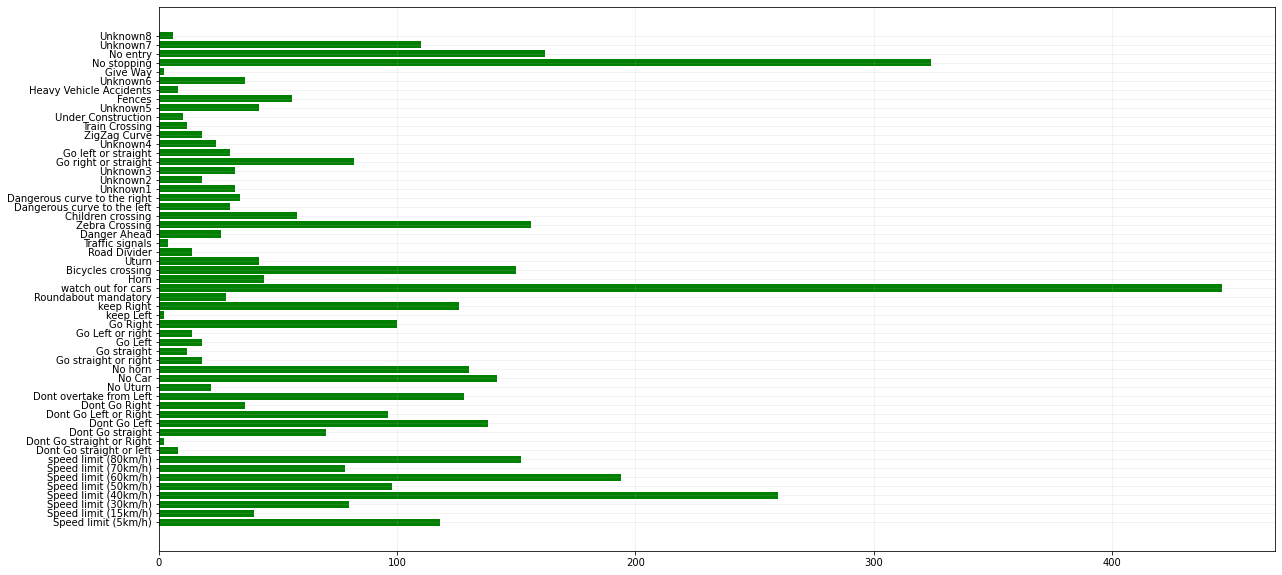

In [ ]:
# Visualizar en una gráfica la distibución de las imágenes por clase
plt.figure(figsize=(20,10))
plt.grid(alpha=0.2)
plt.barh(df['Name'], df['Cantidad Imagenes'], color='g')

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos
xtrain, xval, ytrain, yval = train_test_split(imagenes, clases, train_size=0.8, stratify=clases, random_state=13)
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, stratify=ytrain, train_size = 0.71, random_state=10)

In [ ]:
print('Tamaño de los Datos')
print('Entrenamiento: \n', xtrain.shape, ytrain.shape)
print('Validación: \n', xval.shape, yval.shape)
print('Test: \n', xtest.shape, ytest.shape)

Tamaño de los Datos
Entrenamiento: 
 (2368,) (2368,)
Validación: 
 (834,) (834,)
Test: 
 (968,) (968,)


Preprocesar las imágenes (resize y normalización)

In [ ]:
# Función para normalizar y hacer resize
def preproceso(imagen):
  img = cv2.resize(imagen, (100,100))
  img = img/255.0
  return img

In [ ]:
# Resize y normalización de las imágenes
xtrain = np.array(list(map(preproceso, xtrain)))
xval = np.array(list(map(preproceso, xval)))
xtest = np.array(list(map(preproceso, xtest)))

print('Tamaño de los Datos')
print('Entrenamiento: \n', xtrain.shape, ytrain.shape)
print('Validación: \n', xval.shape, yval.shape)
print('Test: \n', xtest.shape, ytest.shape)

Tamaño de los Datos
Entrenamiento: 
 (2368, 100, 100, 3) (2368,)
Validación: 
 (834, 100, 100, 3) (834,)
Test: 
 (968, 100, 100, 3) (968,)


Visualizar un ejemplo de cada clase

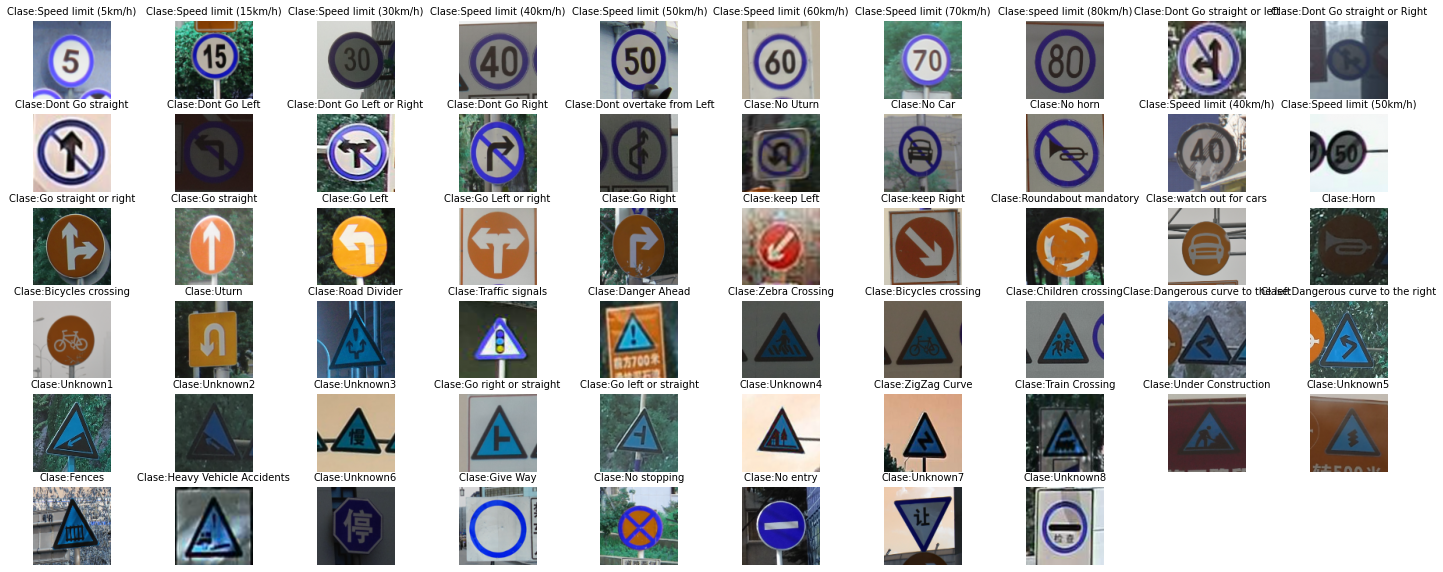

In [ ]:
# Lista de los nombres de cada clase
target_names = list(df['Name'])

plt.figure(figsize=(25,10))

for n in range(0, num_clases):
  for m in range(len(ytest)):
    if ytest[m]==n:
      plt.subplot(6, 10, n+1)
      plt.imshow(xtest[m])
      plt.title('Clase:' + target_names[n], fontsize=10)
      plt.axis('off')
      break

Etiquetas a codificación 'One Hot'

In [ ]:
from tensorflow.keras.utils import to_categorical

ytrain = to_categorical(ytrain, num_clases)
yval = to_categorical(yval, num_clases)
ytest = to_categorical(ytest, num_clases)

print(ytrain[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Crear el Modelo de CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Conv2D(10, (5,5), strides=1, activation='relu', input_shape=(100,100,3), padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(50, (5,5), strides=1, activation='relu', padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(200, (5,5), strides=1, activation='relu', padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(Dense(units=90, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=num_clases, activation='softmax'))

model.compile(optimizer='Adam', loss='MSE', metrics=['accuracy'])

In [ ]:
hist = model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
74/74 [==============================] - 58s 772ms/step - loss: 0.0157 - accuracy: 0.1926 - val_loss: 0.0132 - val_accuracy: 0.2638
Epoch 2/20
74/74 [==============================] - 55s 737ms/step - loss: 0.0115 - accuracy: 0.4379 - val_loss: 0.0089 - val_accuracy: 0.5851
Epoch 3/20
74/74 [==============================] - 54s 734ms/step - loss: 0.0075 - accuracy: 0.6660 - val_loss: 0.0067 - val_accuracy: 0.6954
Epoch 4/20
74/74 [==============================] - 54s 716ms/step - loss: 0.0058 - accuracy: 0.7378 - val_loss: 0.0056 - val_accuracy: 0.7602
Epoch 5/20
74/74 [==============================] - 53s 723ms/step - loss: 0.0048 - accuracy: 0.7855 - val_loss: 0.0049 - val_accuracy: 0.7758
Epoch 6/20
74/74 [==============================] - 54s 725ms/step - loss: 0.0037 - accuracy: 0.8332 - val_loss: 0.0040 - val_accuracy: 0.8213
Epoch 7/20
74/74 [==============================] - 57s 778ms/step - loss: 0.0029 - accuracy: 0.8725 - val_loss: 0.0033 - val_accuracy: 0.8645

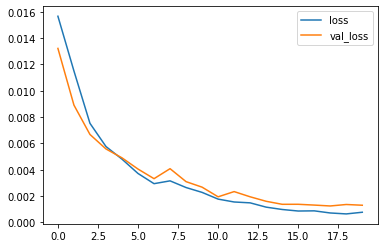

In [ ]:
# Gráfica para visualizar las pérdidas en el entrenamiento
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'], loc='upper right')

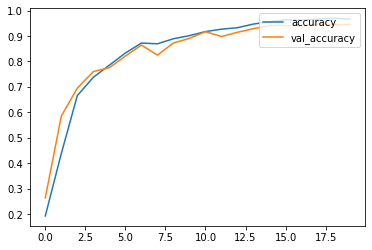

In [ ]:
# Gráfica para visualizar el accuracy en el entrenamiento
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')

In [ ]:
# Guardar Modelo
model.save('/content/drive/MyDrive/Programación/Deep_Learning/Examen1/Modelo1.h5')

Visualizar el Modelo

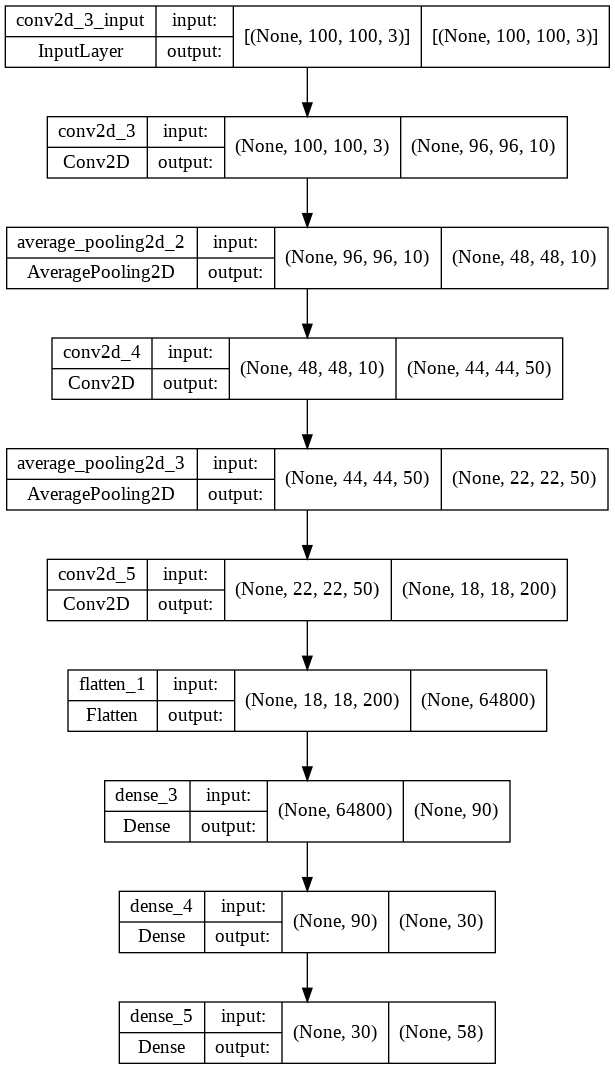

In [ ]:
# Visualizar con Plot Model
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Instalar Visualkeras
!pip install git+https://github.com/paulgavrikov/visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-rkw96x9b
  Running command git clone -q https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-rkw96x9b
     |████████████████████████████████| 989 kB 8.9 MB/s 
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13449 sha256=395ab9ae8cd190543ff2124aa8ea0f38fa02396deb33cc72e500f55c49aaa1d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-_gog8mna/wheels/b8/3b/cf/30a062e766188d5fe50abf3d461720943b7d09906e3d261a94
Successfully built visualkeras


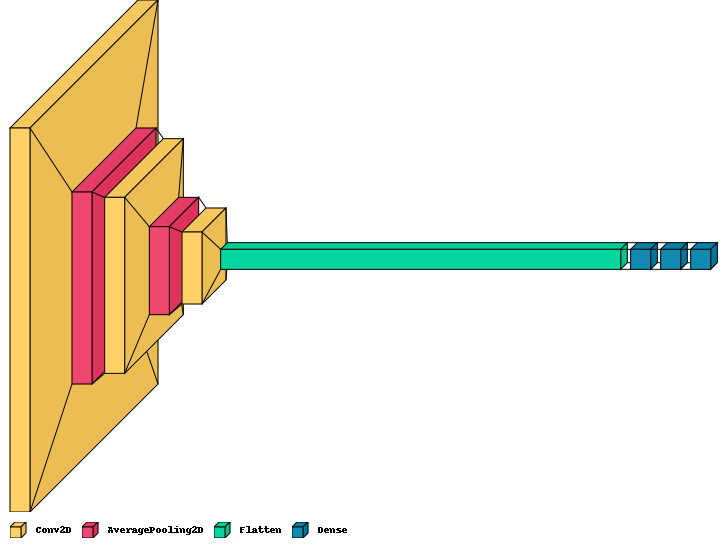

In [ ]:
# Visualizar con Visualkeras
import visualkeras

visualkeras.layered_view(model, draw_volume=True, legend=True)

### Predecir con el Modelo

In [ ]:
# Predecir con el modelo
pred = model.predict(xtest)
# Devolver la posición del valor más alto de cada predicción (ya que está en One Hot)
pred = np.argmax(pred, axis = 1) 
print(pred.shape)

(968,)


In [ ]:
# Comparar y_test con las predicciones
score = model.evaluate(xtest, ytest)
print('Loss:', score[0]) 
print('Accuracy:', score[1])

31/31 [==============================] - 8s 257ms/step - loss: 0.0016 - accuracy: 0.9370
Loss: 0.001566826133057475
Accuracy: 0.9369834661483765


In [ ]:
from sklearn.metrics import classification_report

reporte = classification_report(np.argmax(ytest, axis=1), pred, target_names=target_names)
print(reporte)

                              precision    recall  f1-score   support

         Speed limit (5km/h)       1.00      1.00      1.00        27
        Speed limit (15km/h)       0.88      0.78      0.82         9
        Speed limit (30km/h)       0.90      1.00      0.95        19
        Speed limit (40km/h)       1.00      0.85      0.92        60
        Speed limit (50km/h)       0.95      0.91      0.93        23
        Speed limit (60km/h)       1.00      0.98      0.99        45
        Speed limit (70km/h)       1.00      0.94      0.97        18
        speed limit (80km/h)       0.76      0.97      0.85        35
    Dont Go straight or left       0.00      0.00      0.00         2
   Dont Go straight or Right       0.00      0.00      0.00         1
            Dont Go straight       0.94      1.00      0.97        16
                Dont Go Left       0.97      1.00      0.98        32
       Dont Go Left or Right       0.96      1.00      0.98        22
               Dont

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
